<h1 style="font-size:300%; background-color:white; color:red; text-align:center; line-height : 60px;">
Taller 3 Inteligencia artificial </h1>

<h1 style="font-size:200%; background-color:white; color:black; text-align:center; line-height : 40px;">
Santiago Andrés Gómez Peña </h1>

<h1 style="font-size:200%; background-color:white; color:black; text-align:center; line-height : 40px;">
Julian Felipe Medina Veira </h1>

<h1 style="font-size:200%; background-color:white; color:black; text-align:center; line-height : 40px;">
Santiago Dleon Sanchez Romero </h1>

<ul style="font-size:170%; line-height : 35px;">

Para el taller se tomaron cuatro imagenes de distintas especies de aves de la base de datos obtenida para el proyecto, de manera que se empiece a observar el comportamiento de las funciones aprendidas y el uso que se les puede dar

</ul>

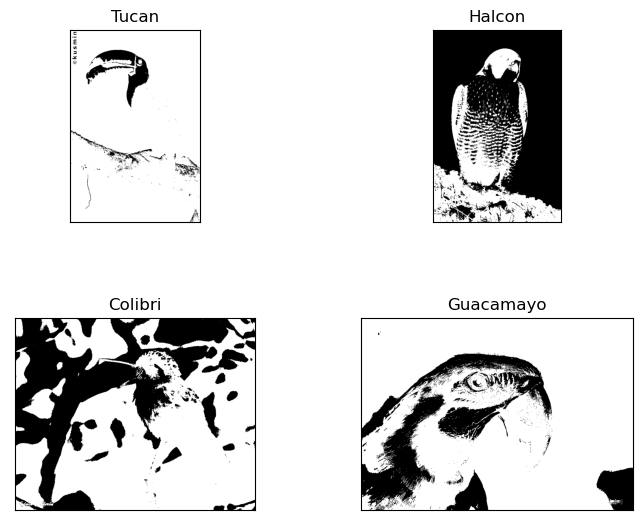

In [30]:
#Carga de las imagenes 

import cv2
import skimage.morphology as morph
import numpy as np
import matplotlib.pyplot as plt #Graficar

#carga la imagen 0 para blanco y negro
img1 = cv2.imread('Taller3_Tucan.jpg',0)  #Tucan Iris
img2 = cv2.imread('Taller3_Halcon.jpg',0)  #Halcon peregrino
img3 = cv2.imread('Taller3_Colibri.jpg',0)  
img4 = cv2.imread('Taller3_Guacamayo.jpg',0)  #Guacamaya azul

ret,img_th1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY_INV)
ret,img_th2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY_INV)
ret,img_th3 = cv2.threshold(img3, 127, 255, cv2.THRESH_BINARY_INV)
ret,img_th4 = cv2.threshold(img4, 127, 255, cv2.THRESH_BINARY_INV)


plt.figure

plt.subplot(221), plt.imshow(img_th1,cmap='gray'), plt.title('Tucan'),plt.xticks([]),plt.yticks([])
plt.subplot(222), plt.imshow(img_th2,cmap='gray'), plt.title('Halcon'),plt.xticks([]),plt.yticks([])
plt.subplot(223), plt.imshow(img_th3,cmap='gray'), plt.title('Colibri'),plt.xticks([]),plt.yticks([])
plt.subplot(224), plt.imshow(img_th4,cmap='gray'), plt.title('Guacamayo'),plt.xticks([]),plt.yticks([])

plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.5, wspace=0.3) # Ajustar la impresion

plt.show()

<p style="font-size:200%; text-align: justify;"><strong>Operaciones basicas:&nbsp;</strong></p>
<ul>

<ul style="font-size:150%; line-height : 35px;">

Las operaciones basicas se centran en el cambio en la interacción del conjunto de pixeles base con un elemento estructurante, considerando entonces la dilatación como la imagen obtenida de la suma de ambos elementos en las posiciones en que se intersectan parcialmente, mientras que la erosión corresponde a la imagen obtenida de las posiciones donde ambos elementos se intersectan completamente.

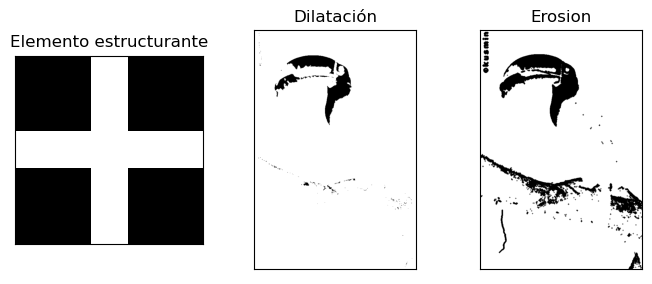

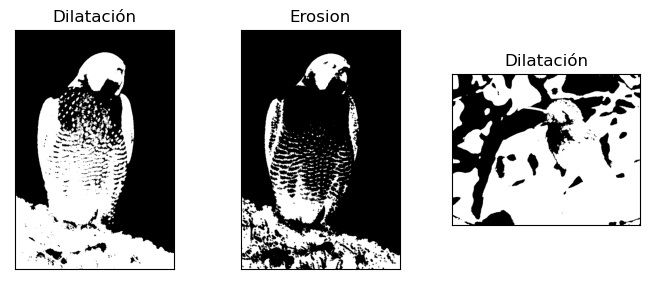

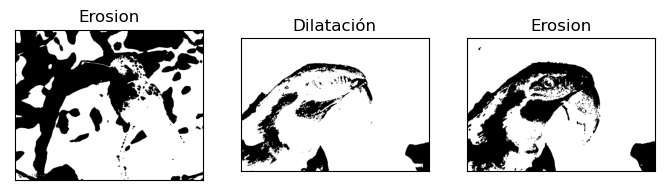

In [66]:
se = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) #CROSS, ELLIPSE, RECT

#Dilatacion

dil1 = cv2.dilate(img_th1,se)
dil2 = cv2.dilate(img_th2,se)
dil3 = cv2.dilate(img_th3,se)
dil4 = cv2.dilate(img_th4,se)


#Erosion
ero1 = cv2.erode(img_th1, se)
ero2 = cv2.erode(img_th2, se)
ero3 = cv2.erode(img_th3, se)
ero4 = cv2.erode(img_th4, se)

#Plot

plt.figure(1)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0.01,wspace=0.2)

plt.subplot(231),plt.imshow(se,cmap = 'gray'), plt.title('Elemento estructurante'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(dil1,cmap = 'gray'), plt.title('Dilatación'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(ero1,cmap = 'gray'), plt.title('Erosion'), plt.xticks([]), plt.yticks([])

plt.figure(2)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0.01,wspace=0.2)

plt.subplot(231),plt.imshow(dil2,cmap = 'gray'), plt.title('Dilatación'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(ero2,cmap = 'gray'), plt.title('Erosion'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(dil3,cmap = 'gray'), plt.title('Dilatación'), plt.xticks([]), plt.yticks([])

plt.figure(3)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0.01,wspace=0.2)

plt.subplot(231),plt.imshow(ero3,cmap = 'gray'), plt.title('Erosion'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(dil4,cmap = 'gray'), plt.title('Dilatación'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(ero4,cmap = 'gray'), plt.title('Erosion'), plt.xticks([]), plt.yticks([])

plt.show()

<p style="font-size:200%; text-align: justify;"><strong>Apertura y Cierre:&nbsp;</strong></p>
<ul>

<ul style="font-size:150%; line-height : 35px;">

Las operaciones de dilatación y erosión son duales mas no son inversas, lo que genera que al realizarlas a una misma imagen en diferente orden se obtengan resultados diferentes, esto se conoce como operaciones de apertura y de cierre

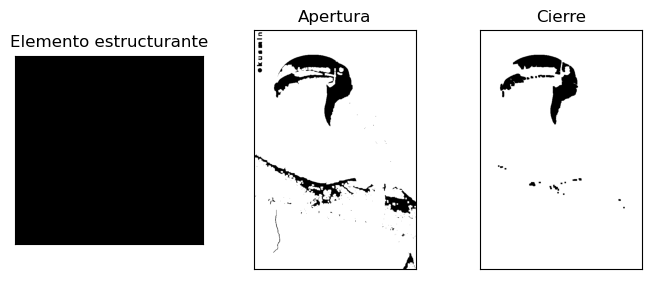

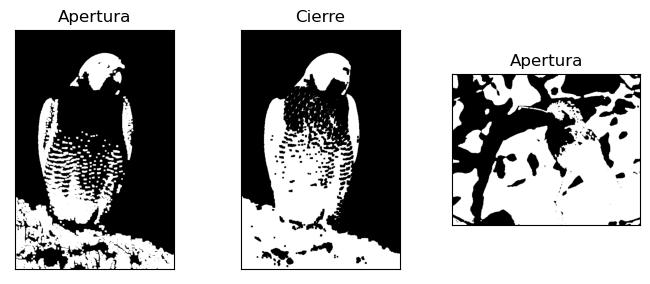

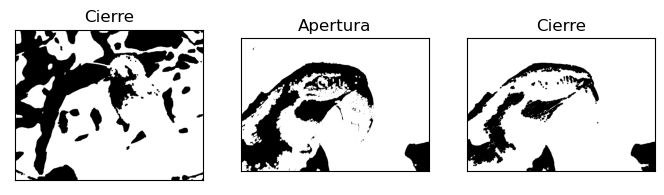

In [45]:
se = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

#Apertura
op1 = cv2.morphologyEx(img_th1,cv2.MORPH_OPEN,se)
op1 = cv2.morphologyEx(op1,cv2.MORPH_OPEN,se)
op2 = cv2.morphologyEx(img_th2,cv2.MORPH_OPEN,se)
op2 = cv2.morphologyEx(op2,cv2.MORPH_OPEN,se)
op3 = cv2.morphologyEx(img_th3,cv2.MORPH_OPEN,se)
op3 = cv2.morphologyEx(op3,cv2.MORPH_OPEN,se)
op4 = cv2.morphologyEx(img_th4,cv2.MORPH_OPEN,se)
op4 = cv2.morphologyEx(op4,cv2.MORPH_OPEN,se)

#Cierre
cl1 = cv2.morphologyEx(img_th1,cv2.MORPH_CLOSE,se)
cl1 = cv2.morphologyEx(cl1,cv2.MORPH_CLOSE,se)
cl2 = cv2.morphologyEx(img_th2,cv2.MORPH_CLOSE,se)
cl2 = cv2.morphologyEx(cl2,cv2.MORPH_CLOSE,se)
cl3 = cv2.morphologyEx(img_th3,cv2.MORPH_CLOSE,se)
cl3 = cv2.morphologyEx(cl3,cv2.MORPH_CLOSE,se)
cl4 = cv2.morphologyEx(img_th4,cv2.MORPH_CLOSE,se)
cl4 = cv2.morphologyEx(cl4,cv2.MORPH_CLOSE,se)


#Plot

plt.figure(1)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0.01,wspace=0.2)

plt.subplot(231),plt.imshow(se,cmap = 'gray'), plt.title('Elemento estructurante'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(op1,cmap = 'gray'), plt.title('Apertura'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(cl1,cmap = 'gray'), plt.title('Cierre'), plt.xticks([]), plt.yticks([])

plt.figure(2)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0.01,wspace=0.2)

plt.subplot(231),plt.imshow(op2,cmap = 'gray'), plt.title('Apertura'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(cl2,cmap = 'gray'), plt.title('Cierre'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(op3,cmap = 'gray'), plt.title('Apertura'), plt.xticks([]), plt.yticks([])

plt.figure(3)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0.01,wspace=0.2)

plt.subplot(231),plt.imshow(cl3,cmap = 'gray'), plt.title('Cierre'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(op4,cmap = 'gray'), plt.title('Apertura'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(cl4,cmap = 'gray'), plt.title('Cierre'), plt.xticks([]), plt.yticks([])

plt.show()

<p style="font-size:200%; text-align: justify;"><strong>Algoritmos morfologicos:&nbsp;</strong></p>
<ul>

<ul style="font-size:150%; line-height : 35px;">

Existen diversos algoritmos morfologicos utilizados, entre los que se encuentran principalmente la transformada Hit-or-miss, la extracción de fronteras, llenado de regiones, extracción de componentes, adelgazamiento, engrosamiento y esqueleto

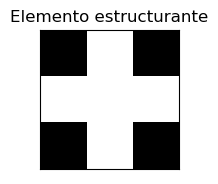

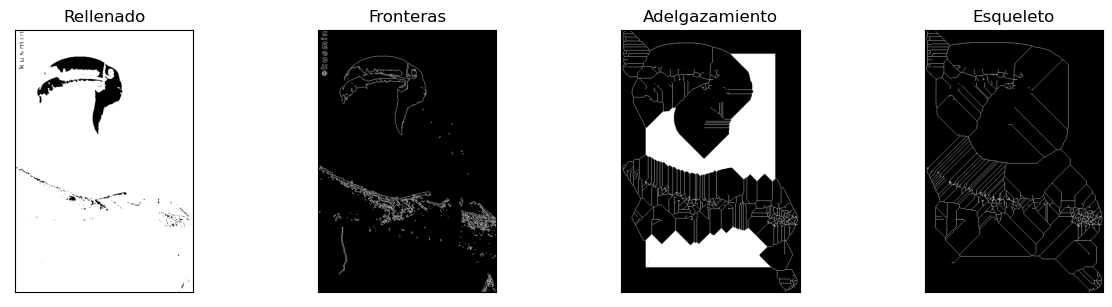

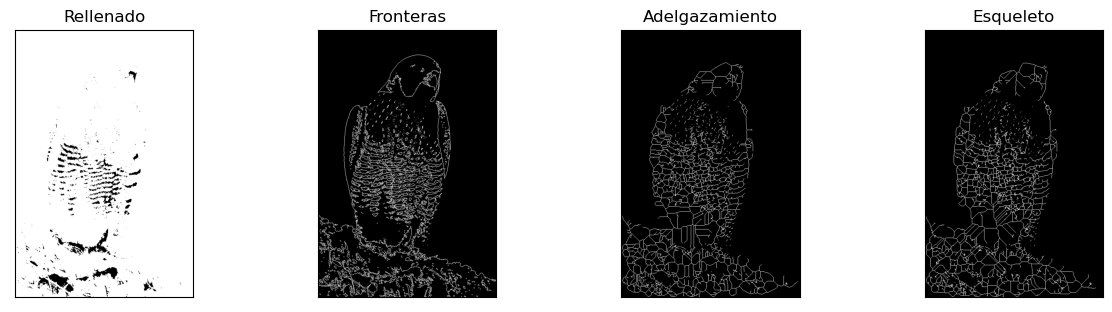

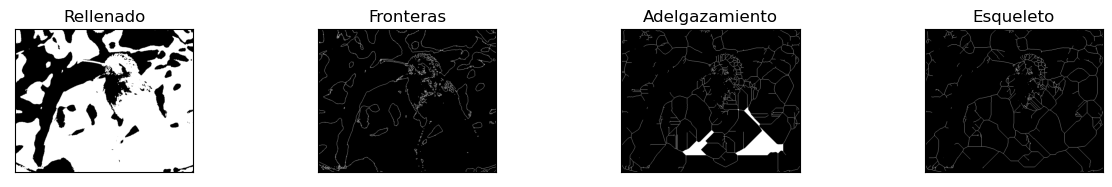

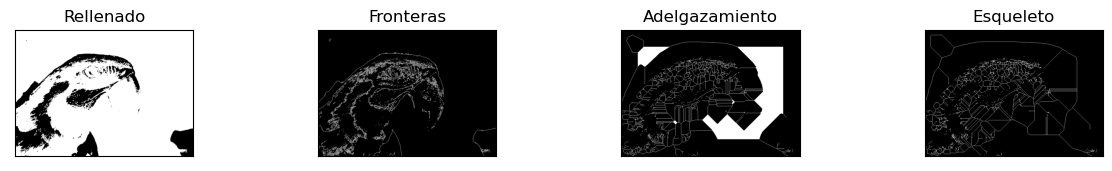

In [68]:
#Elementos estructurantes
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

#Extraccion de fronteras
bound1 = img_th1 - cv2.erode(img_th1,se)
bound2 = img_th2 - cv2.erode(img_th2,se)
bound3 = img_th3 - cv2.erode(img_th3,se)
bound4 = img_th4 - cv2.erode(img_th4,se)

#Dilatacion para mejorar conectividad
dil1 = cv2.dilate(img_th1,se)
dil2 = cv2.dilate(img_th2,se)
dil3 = cv2.dilate(img_th3,se)
dil4 = cv2.dilate(img_th4,se)

#Adelgazamiento
thin1 = morph.thin(dil1,75)
thin2 = morph.thin(dil2,75)
thin3 = morph.thin(dil3,75)
thin4 = morph.thin(dil4,75)

#Esqueleto
skel1 = morph.skeletonize(dil1//255)
skel2 = morph.skeletonize(dil2//255)
skel3 = morph.skeletonize(dil3//255)
skel4 = morph.skeletonize(dil4//255)

#Rellenado de agujeros
Ac1 = (255 - dil1)//255
Ac2 = (255 - dil2)//255
Ac3 = (255 - dil3)//255
Ac4 = (255 - dil4)//255

X1 = np.zeros(dil1.shape)
X2 = np.zeros(dil2.shape)
X3 = np.zeros(dil3.shape)
X4 = np.zeros(dil4.shape)
X1[6,10] = 1 #Este pixel debe ser identificado como agujero
X2[6,10] = 1 
X3[6,10] = 1 
X4[6,10] = 1 

Z1 = cv2.dilate(X1,se)*Ac1
while(np.sum(Z1) != np.sum(X1)):
    X1 = Z1
    Z1 = cv2.dilate(X1,se)*Ac1

Z2 = cv2.dilate(X2,se)*Ac2
while(np.sum(Z2) != np.sum(X2)):
    X2 = Z2
    Z2 = cv2.dilate(X2,se)*Ac2
    
Z3 = cv2.dilate(X3,se)*Ac3
while(np.sum(Z3) != np.sum(X3)):
    X3 = Z3
    Z3 = cv2.dilate(X3,se)*Ac3

Z4 = cv2.dilate(X4,se)*Ac4
while(np.sum(Z4) != np.sum(X4)):
    X4 = Z4
    Z4 = cv2.dilate(X4,se)*Ac4

plt.figure(1)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0.01,wspace=0.2)

plt.subplot(141),plt.imshow(se,cmap = 'gray'), plt.title('Elemento estructurante'), plt.xticks([]), plt.yticks([])


plt.figure(2)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1.7,hspace=0.01,wspace=0.7)

plt.subplot(141),plt.imshow(X1*255+dil1,cmap = 'gray'), plt.title('Rellenado'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(bound1,cmap = 'gray'), plt.title('Fronteras'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(thin1,cmap = 'gray'), plt.title('Adelgazamiento'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(skel1,cmap = 'gray'), plt.title('Esqueleto'), plt.xticks([]), plt.yticks([])

plt.figure(3)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1.7,hspace=0.01,wspace=0.7)

plt.subplot(141),plt.imshow(X2*255+dil2,cmap = 'gray'), plt.title('Rellenado'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(bound2,cmap = 'gray'), plt.title('Fronteras'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(thin2,cmap = 'gray'), plt.title('Adelgazamiento'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(skel2,cmap = 'gray'), plt.title('Esqueleto'), plt.xticks([]), plt.yticks([])

plt.figure(4)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1.7,hspace=0.01,wspace=0.7)

plt.subplot(141),plt.imshow(X3*255+dil3,cmap = 'gray'), plt.title('Rellenado'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(bound3,cmap = 'gray'), plt.title('Fronteras'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(thin3,cmap = 'gray'), plt.title('Adelgazamiento'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(skel3,cmap = 'gray'), plt.title('Esqueleto'), plt.xticks([]), plt.yticks([])

plt.figure(5)
plt.subplots_adjust(top=1,bottom=0,left=0,right=1.7,hspace=0.01,wspace=0.7)

plt.subplot(141),plt.imshow(X4*255+dil4,cmap = 'gray'), plt.title('Rellenado'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(bound4,cmap = 'gray'), plt.title('Fronteras'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(thin4,cmap = 'gray'), plt.title('Adelgazamiento'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(skel4,cmap = 'gray'), plt.title('Esqueleto'), plt.xticks([]), plt.yticks([])

plt.show()